# Imports:

In [1]:
# General imports.
import numpy as np
import matplotlib.pyplot as plt

# Filter requirements.
from scipy import signal

# Staditical helpers.
import scipy.stats as stats

# Panda for dataset (.csv) management.
import pandas as pd

# Sklearn Utilities.
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn import preprocessing

from sklearn.utils import shuffle


In [65]:
dataset_path = "data/"

# **Problem and Database description:**

In [67]:
f = open(dataset_path + 'README', 'r')
file_contents = f.read()
print(file_contents)
f.close()

1. Title: Activity Recognition from a Single Chest-Mounted Accelerometer
	Updated Nov, 2013 , P. Casale, email: plcasale@ieee.org
	
2. Abstract: The dataset collects data from a wearable accelerometer mounted on the chest. Uncalibrated Accelerometer Data are collected from 15 participants performing 7 activities. The dataset is intended for Activity Recognition research purposes. It provides challenges for identification and authentication of people using motion patterns.

3. Relevant Information:
   --- The dataset collects data from a wearable accelerometer mounted on the chest
   --- Sampling frequency of the accelerometer: 52 Hz
   --- Accelerometer Data are Uncalibrated
   --- Number of Participants: 15
   --- Number of Activities: 7
   --- Data Format: CSV

4. Dataset Information
   --- Data are separated by participant
   --- Each file contains the following information
       ---- sequential number, x acceleration, y acceleration, z acceleration, label 
   --- Labels are codifi

Dataset:

In [68]:
# We load the user data using panda.
data_user_1 = pd.read_csv( dataset_path + "1.csv" )
data_user_1.drop(data_user_1.tail(1).index,inplace=True) 

data_user_2 = pd.read_csv( dataset_path + "2.csv" )
data_user_2.drop(data_user_2.tail(1).index,inplace=True) 

data_user_3 = pd.read_csv( dataset_path + "3.csv" )
data_user_3.drop(data_user_3.tail(1).index,inplace=True) 

data_user_4 = pd.read_csv( dataset_path + "4.csv" )
data_user_4.drop(data_user_4.tail(1).index,inplace=True) 

data_user_5 = pd.read_csv( dataset_path + "5.csv" )
data_user_5.drop(data_user_5.tail(1).index,inplace=True) 

data_user_6 = pd.read_csv( dataset_path + "6.csv" )
data_user_6.drop(data_user_6.tail(1).index,inplace=True) 

data_user_7 = pd.read_csv( dataset_path + "7.csv" )
data_user_7.drop(data_user_7.tail(1).index,inplace=True) 

data_user_8 = pd.read_csv( dataset_path + "8.csv" )
data_user_8.drop(data_user_8.tail(1).index,inplace=True) 

data_user_9 = pd.read_csv( dataset_path + "9.csv" )
data_user_9.drop(data_user_9.tail(1).index,inplace=True)

data_user_10 = pd.read_csv( dataset_path + "10.csv" )
data_user_10.drop(data_user_10.tail(1).index,inplace=True) 

data_user_11 = pd.read_csv( dataset_path + "11.csv" )
data_user_11.drop(data_user_11.tail(1).index,inplace=True) 

data_user_12 = pd.read_csv( dataset_path + "12.csv" )
data_user_12.drop(data_user_12.tail(1).index,inplace=True) 

data_user_13 = pd.read_csv( dataset_path + "13.csv" )
data_user_13.drop(data_user_13.tail(1).index,inplace=True) 

data_user_14 = pd.read_csv( dataset_path + "14.csv" )
data_user_14.drop(data_user_14.tail(1).index,inplace=True) 

data_user_15 = pd.read_csv( dataset_path + "15.csv" )
data_user_15.drop(data_user_15.tail(1).index,inplace=True) 

In [69]:
# We can show tan example of the data:
data_user_2

,0,1984,1998,1645,1
0,1.0,1984,2003,1653,1
1,2.0,1987,2002,1648,1
2,3.0,1990,2001,1650,1
3,4.0,1992,2000,1657,1
4,5.0,1987,2003,1652,1
5,6.0,1980,1997,1651,1
6,7.0,1979,1999,1651,1
7,8.0,1984,2001,1644,1
8,9.0,1992,2006,1655,1
9,10.0,1983,2000,1645,1


# DATA PRE-PROCESSING: FEATURE ENGINEERING


## Label Renaming:

We can see how for each user we got, we have a big ammount of data associated with it. Since each user has his own dataset, we can try to get different aproach methods for each user.


First, lets work on those columns. As we saw, the colums dont have their actual names, but numbers  instead. We can resolve that problem with the next panda function : data_user_x.rename

Yet it is not that easy. Panda's rename function requires a dictionary where the keys are the colums we want to change. 

In [70]:
data_user_1.columns

Index(['0', '1502', '2215', '2153', '1'], dtype='object')

In [71]:
column_change = {
    '0': 'sequential_number', 
    data_user_1.columns[1]: 'x_acceleration', # We make the values according to the names 
    data_user_1.columns[2]: 'y_acceleration', # given in the readme file.
    data_user_1.columns[3]: 'z_acceleration',
    '1': 'label'}
data_user_1.rename( columns = column_change, inplace = True )
data_user_1.columns

Index(['sequential_number', 'x_acceleration', 'y_acceleration',
       'z_acceleration', 'label'],
      dtype='object')

Now we can just apply this dictionary to every user data.


In [72]:
# Sadly, we need to redefine the dictionary for each user, since the random values
# used for the colums seem to be different depending on the user.

column_change = { '0': 'sequential_number', data_user_2.columns[1]: 'x_acceleration', data_user_2.columns[2]: 'y_acceleration', data_user_2.columns[3]: 'z_acceleration', '1': 'label'}
data_user_2.rename( columns = column_change, inplace = True )

column_change = { '0': 'sequential_number', data_user_3.columns[1]: 'x_acceleration', data_user_3.columns[2]: 'y_acceleration', data_user_3.columns[3]: 'z_acceleration', '1': 'label'}
data_user_3.rename( columns = column_change, inplace = True )

column_change = { '0': 'sequential_number', data_user_4.columns[1]: 'x_acceleration', data_user_4.columns[2]: 'y_acceleration', data_user_4.columns[3]: 'z_acceleration', '1': 'label'}
data_user_4.rename( columns = column_change, inplace = True )

column_change = { '0': 'sequential_number', data_user_5.columns[1]: 'x_acceleration', data_user_5.columns[2]: 'y_acceleration', data_user_5.columns[3]: 'z_acceleration', '1': 'label'}
data_user_5.rename( columns = column_change, inplace = True )

column_change = { '0': 'sequential_number', data_user_6.columns[1]: 'x_acceleration', data_user_6.columns[2]: 'y_acceleration', data_user_6.columns[3]: 'z_acceleration', '1': 'label'}
data_user_6.rename( columns = column_change, inplace = True )

column_change = { '0': 'sequential_number', data_user_7.columns[1]: 'x_acceleration', data_user_7.columns[2]: 'y_acceleration', data_user_7.columns[3]: 'z_acceleration', '1': 'label'}
data_user_7.rename( columns = column_change, inplace = True )

column_change = { '0': 'sequential_number', data_user_8.columns[1]: 'x_acceleration', data_user_8.columns[2]: 'y_acceleration', data_user_8.columns[3]: 'z_acceleration', '1': 'label'}
data_user_8.rename( columns = column_change, inplace = True )

column_change = { '0': 'sequential_number', data_user_9.columns[1]: 'x_acceleration', data_user_9.columns[2]: 'y_acceleration', data_user_9.columns[3]: 'z_acceleration', '1': 'label'}
data_user_9.rename( columns = column_change, inplace = True )

column_change = { '0': 'sequential_number', data_user_10.columns[1]: 'x_acceleration', data_user_10.columns[2]: 'y_acceleration', data_user_10.columns[3]: 'z_acceleration', '1': 'label'}
data_user_10.rename( columns = column_change, inplace = True )

column_change = { '0': 'sequential_number', data_user_11.columns[1]: 'x_acceleration', data_user_11.columns[2]: 'y_acceleration', data_user_11.columns[3]: 'z_acceleration', '1': 'label'}
data_user_11.rename( columns = column_change, inplace = True )

column_change = { '0': 'sequential_number', data_user_12.columns[1]: 'x_acceleration', data_user_12.columns[2]: 'y_acceleration', data_user_12.columns[3]: 'z_acceleration', '1': 'label'}
data_user_12.rename( columns = column_change, inplace = True )

column_change = { '0': 'sequential_number', data_user_13.columns[1]: 'x_acceleration', data_user_13.columns[2]: 'y_acceleration', data_user_13.columns[3]: 'z_acceleration', '1': 'label'}
data_user_13.rename( columns = column_change, inplace = True )

column_change = { '0': 'sequential_number', data_user_14.columns[1]: 'x_acceleration', data_user_14.columns[2]: 'y_acceleration', data_user_14.columns[3]: 'z_acceleration', '1': 'label'}
data_user_14.rename( columns = column_change, inplace = True )

column_change = { '0': 'sequential_number', data_user_15.columns[1]: 'x_acceleration', data_user_15.columns[2]: 'y_acceleration', data_user_15.columns[3]: 'z_acceleration', '1': 'label'}
data_user_15.rename( columns = column_change, inplace = True )



## Feature Creation / Extraction:


*Feature creation is a critical step in the development of any classifier. An activity recognition system does not solvethe classification task directly on raw acceleration data. Generally, the classification is performed after an informativedata representation is created in terms of feature vectors.* -- [Akram Bayat, Marc Pomplun, Duc A: A study on human activity recognition using accelerometer data from smartphones.](https://reader.elsevier.com/reader/sd/pii/S1877050914008643?token=AFCC0ACECB8F44B1B46B4CD933F4090BCF49548C734990E8F7B049102B11C9AAFA9657268CD0987CBC4F90C957397594)

Althought the raw accelerometer data is usefull, it doesnt give us any real information about the real work tasks the users are doing. We can try to work mathematically around this problem, trying to engineer new features from our current data that will allow us to find those features that tell us more about whats going on in real life.

Firstly we need to understand the data that has been given to us. We can see we have different samples over time for each user, that tell us their x,y,z acceleration. We can try to plot these values for one user, to see if we can spot any pattern or reach some intuition about what to do next.

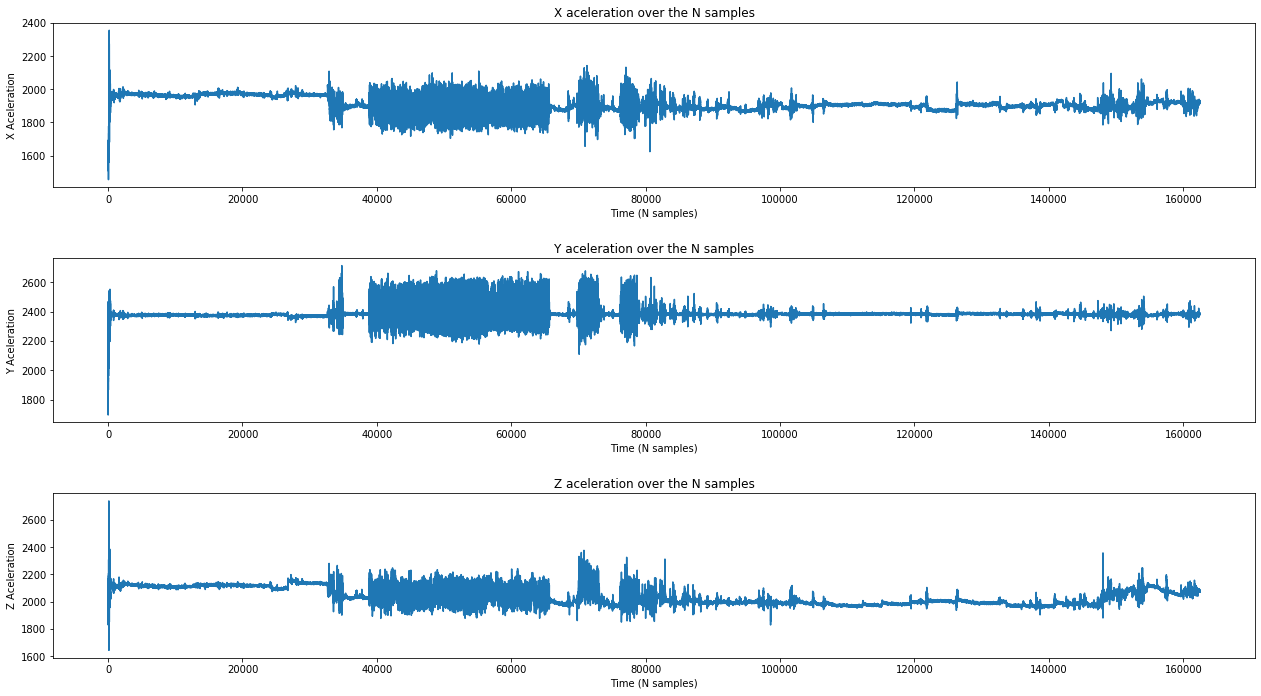

In [73]:
# We grab the values of each acceleration feature:
x_values = data_user_1['x_acceleration'].values
y_values = data_user_1['y_acceleration'].values
z_values = data_user_1['z_acceleration'].values

# We create the time (in samples) vector:
t = np.arange(len(data_user_1['sequential_number']))

# We set the figure:
fig, (ax1, ax2, ax3) = plt.subplots(3,1) 
fig.set_size_inches(18.5, 10.5)
fig.tight_layout(pad=5.0)

# We represent the values of x,y,z in N samples:
ax1.set(xlabel='Time (N samples)', ylabel='X Aceleration',
       title='X aceleration over the N samples')
ax1.plot(t, x_values)
ax2.set(xlabel='Time (N samples)', ylabel='Y Aceleration',
       title='Y aceleration over the N samples')
ax2.plot(t, y_values)
ax3.set(xlabel='Time (N samples)', ylabel='Z Aceleration',
       title='Z aceleration over the N samples')
ax3.plot(t, z_values)

### Separating gravity from user acceleration, AC/DC components.

Seeing the raw data displayed lets us see how the different x,y,z accelerations are related, like in how between 40k - 65k samples the activity is hudge for the 3 variables. Yet its hard to obtain any intuition of these plots, since we can argue that we dont have only the user acceleration but gravity is also affecting the lectures. Maybe we can separate the gravity from the user acceleration?

Thankfully, we can. We can take each of these accelerations over time (in samples, of course) and filter them, so we can differentiate bewteen their AC and DC components. The AC component will be the high frequency component and is mostly related to the dynamic motion the subject (aka: walking, running, etc). On the other hand, the low-frequency component of the acceleration signal, the DC component, is tied to the influence of gravity on the lectures.

We can separate both of these using high-pass filters (-[High-pass filter](https://en.wikipedia.org/wiki/High-pass_filter)-) and low-pass filters (-[Low-pass filter](https://en.wikipedia.org/wiki/Low-pass_filter)-), then work with these new variables and see what use we can give them.

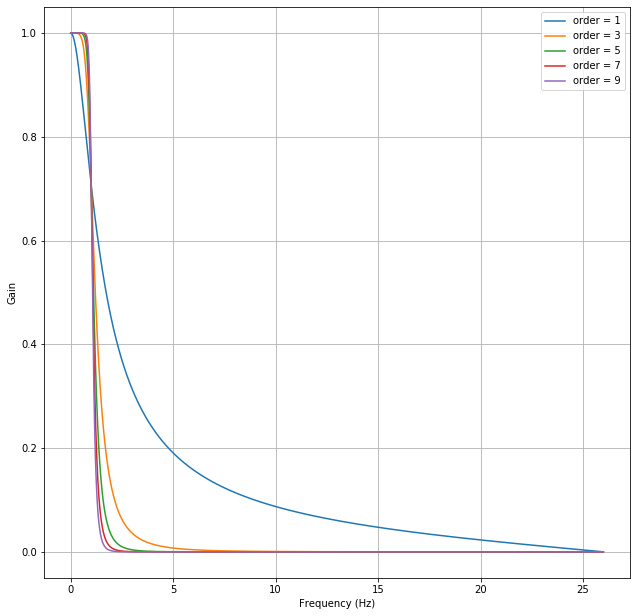

In [74]:
  # First we define the sampling rate. If the frecuency is 52Hz, 
  # that means we take 52 measurements (samples) every second.
  fs = 52.0    

###############################################################################
###############################################################################
  # Define the hithe filters:
  def ACDC_bandpass(cut, fs, order, mode):
       nyq = 0.5 * fs
       low = cut / nyq
       b, a = signal.butter(order, low, btype=mode)
       return b, a
  def ACDC_filter(data, cut, fs, order, mode):
       b, a = ACDC_bandpass(cut, fs, order, mode)
       y = signal.lfilter(b, a, data)
       return y
###############################################################################
  # Plot the frequency response for a few different orders.
  # This allows us to deduce the order we need for the filter.
  # This step can be skipped, since for raw data like the one we have,
  # the order is always 1.
  # This is mainly for the python code, with no real insight on the ML problem.
  # But we didnt want to look like we just took a random order
  highcut = 1
  #Figure size
  plt.figure(1)
  plt.figure(1).set_size_inches(10.5, 10.5)
  plt.clf()
  # Printing the responses.
  for order in [1,3,5,7,9]:
    b, a = ACDC_bandpass(highcut, fs, order, 'lowpass')
    w, h = signal.freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')
###############################################################################
###############################################################################



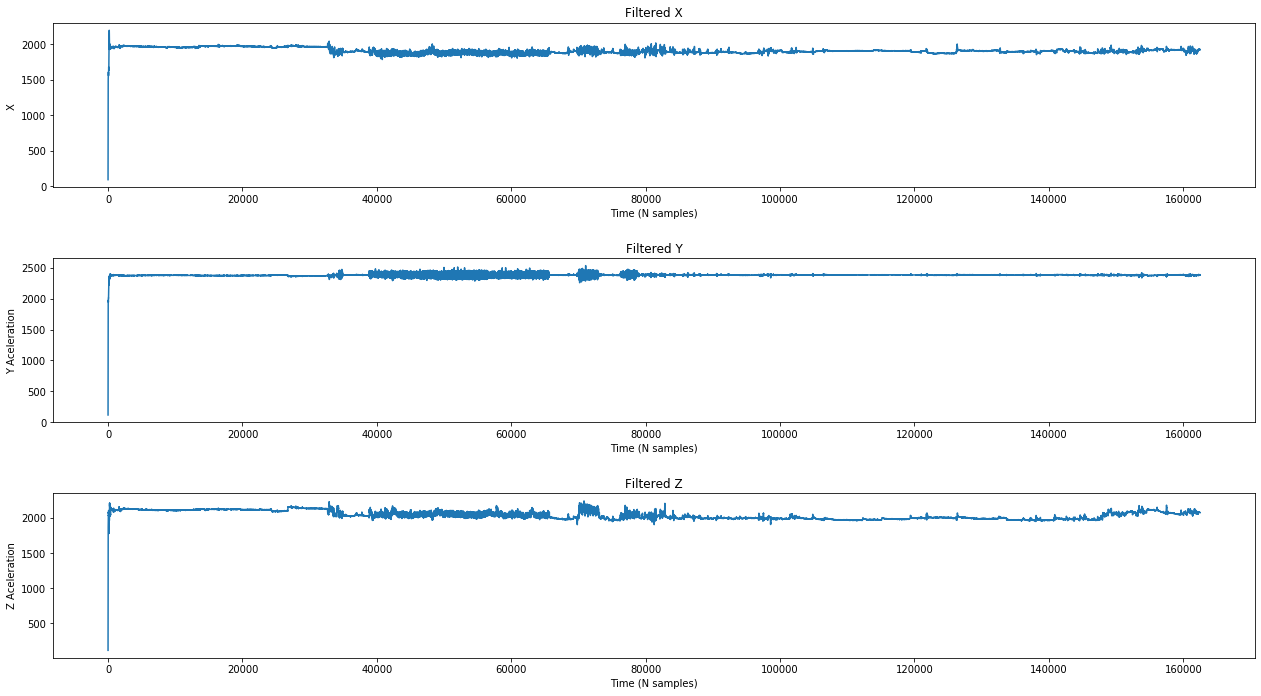

In [75]:
###############################################################################
###############################################################################
# This next part is based on the findings done by 
# Akram Bayat, Marc Pomplun, Duc A on an study on human activity recognition 
# using accelerometer data from smartphones.
###############################################################################
# Theoptimal cutoff frequency in order to exclude gravity component 
# alone would range from 0.1 to 0.5 HZ when you use 100 fs. Yet, on different
# papers, this cutoff frecuency is taken arbitrarily. We have decided to take
# 1Hz as the cutoff frecuency.
cutoff = 1
order = 1
###############################################################################
###############################################################################

# Now using the lowpass mode, we can visualize te effects of gravity easily.

mode = 'lowpass' # Lowpass to see the DC component
# mode = 'highpass' # Highpass to see the AC component



filtered_user_1_x = ACDC_filter(x_values, cutoff, fs, order, mode)
filtered_user_1_y = ACDC_filter(y_values, cutoff, fs, order, mode)
filtered_user_1_z = ACDC_filter(z_values, cutoff, fs, order, mode)

# With this we can visualize the results for tge firts user, the lowpass filtered signal

t = np.arange(len(data_user_1['sequential_number']))
fig, (ax1, ax2, ax3) = plt.subplots(3,1) 
fig.set_size_inches(18.5, 10.5)
fig.tight_layout(pad=5.0)
ax1.set(xlabel='Time (N samples)', ylabel='X ',
       title='Filtered X')
ax1.plot(t, filtered_user_1_x)
ax2.set(xlabel='Time (N samples)', ylabel='Y Aceleration',
       title='Filtered Y')
ax2.plot(t, filtered_user_1_y)
ax3.set(xlabel='Time (N samples)', ylabel='Z Aceleration',
       title='Filtered Z')
ax3.plot(t, filtered_user_1_z)


### AC/DC feature insertion
Now with the filters defined, we can define 6 new features for each user, that would correspond with the AC,DC filtered version of every acceleration feature
(AC[x,y,z] and DC[x,y,z]).

Sadly, there is no easy way to do this, but to use panda to go 1 by 1 on everyone of our subjects to add the new variables to their DataFrames. We recommend minimizing this part and running the cells at the same time ( run [x] hidden cells ). 

If any problems should arise, it would be necesary to run the .csv reading at the start again, and the label renaming section. This should only happen or be needed when this part is run more than one time. We strongly recommend running this part only once, and continuing.

In [76]:
mode = 'highpass' # Highpass to set the AC component

In [77]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_1.insert(4, "AC_x_Acceleration", ACDC_filter(data_user_1['x_acceleration'].values, cutoff, fs, order, mode))
data_user_1.insert(5, "AC_Y_Acceleration", ACDC_filter(data_user_1['y_acceleration'].values, cutoff, fs, order, mode))
data_user_1.insert(6, "AC_z_Acceleration", ACDC_filter(data_user_1['z_acceleration'].values, cutoff, fs, order, mode))

In [78]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_2.insert(4, "AC_x_Acceleration", ACDC_filter(data_user_2['x_acceleration'].values, cutoff, fs, order, mode))
data_user_2.insert(5, "AC_Y_Acceleration", ACDC_filter(data_user_2['y_acceleration'].values, cutoff, fs, order, mode))
data_user_2.insert(6, "AC_z_Acceleration", ACDC_filter(data_user_2['z_acceleration'].values, cutoff, fs, order, mode))

In [79]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_3.insert(4, "AC_x_Acceleration", ACDC_filter(data_user_3['x_acceleration'].values, cutoff, fs, order, mode))
data_user_3.insert(5, "AC_Y_Acceleration", ACDC_filter(data_user_3['y_acceleration'].values, cutoff, fs, order, mode))
data_user_3.insert(6, "AC_z_Acceleration", ACDC_filter(data_user_3['z_acceleration'].values, cutoff, fs, order, mode))

In [80]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_4.insert(4, "AC_x_Acceleration", ACDC_filter(data_user_4['x_acceleration'].values, cutoff, fs, order, mode))
data_user_4.insert(5, "AC_Y_Acceleration", ACDC_filter(data_user_4['y_acceleration'].values, cutoff, fs, order, mode))
data_user_4.insert(6, "AC_z_Acceleration", ACDC_filter(data_user_4['z_acceleration'].values, cutoff, fs, order, mode))

In [81]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_5.insert(4, "AC_x_Acceleration", ACDC_filter(data_user_5['x_acceleration'].values, cutoff, fs, order, mode))
data_user_5.insert(5, "AC_Y_Acceleration", ACDC_filter(data_user_5['y_acceleration'].values, cutoff, fs, order, mode))
data_user_5.insert(6, "AC_z_Acceleration", ACDC_filter(data_user_5['z_acceleration'].values, cutoff, fs, order, mode))

In [82]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_6.insert(4, "AC_x_Acceleration", ACDC_filter(data_user_6['x_acceleration'].values, cutoff, fs, order, mode))
data_user_6.insert(5, "AC_Y_Acceleration", ACDC_filter(data_user_6['y_acceleration'].values, cutoff, fs, order, mode))
data_user_6.insert(6, "AC_z_Acceleration", ACDC_filter(data_user_6['z_acceleration'].values, cutoff, fs, order, mode))

In [83]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_7.insert(4, "AC_x_Acceleration", ACDC_filter(data_user_7['x_acceleration'].values, cutoff, fs, order, mode))
data_user_7.insert(5, "AC_Y_Acceleration", ACDC_filter(data_user_7['y_acceleration'].values, cutoff, fs, order, mode))
data_user_7.insert(6, "AC_z_Acceleration", ACDC_filter(data_user_7['z_acceleration'].values, cutoff, fs, order, mode))

In [84]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_8.insert(4, "AC_x_Acceleration", ACDC_filter(data_user_8['x_acceleration'].values, cutoff, fs, order, mode))
data_user_8.insert(5, "AC_Y_Acceleration", ACDC_filter(data_user_8['y_acceleration'].values, cutoff, fs, order, mode))
data_user_8.insert(6, "AC_z_Acceleration", ACDC_filter(data_user_8['z_acceleration'].values, cutoff, fs, order, mode))

In [85]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_9.insert(4, "AC_x_Acceleration", ACDC_filter(data_user_9['x_acceleration'].values, cutoff, fs, order, mode))
data_user_9.insert(5, "AC_Y_Acceleration", ACDC_filter(data_user_9['y_acceleration'].values, cutoff, fs, order, mode))
data_user_9.insert(6, "AC_z_Acceleration", ACDC_filter(data_user_9['z_acceleration'].values, cutoff, fs, order, mode))

In [86]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_10.insert(4, "AC_x_Acceleration", ACDC_filter(data_user_10['x_acceleration'].values, cutoff, fs, order, mode))
data_user_10.insert(5, "AC_Y_Acceleration", ACDC_filter(data_user_10['y_acceleration'].values, cutoff, fs, order, mode))
data_user_10.insert(6, "AC_z_Acceleration", ACDC_filter(data_user_10['z_acceleration'].values, cutoff, fs, order, mode))

In [87]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_11.insert(4, "AC_x_Acceleration", ACDC_filter(data_user_11['x_acceleration'].values, cutoff, fs, order, mode))
data_user_11.insert(5, "AC_Y_Acceleration", ACDC_filter(data_user_11['y_acceleration'].values, cutoff, fs, order, mode))
data_user_11.insert(6, "AC_z_Acceleration", ACDC_filter(data_user_11['z_acceleration'].values, cutoff, fs, order, mode))

In [88]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_12.insert(4, "AC_x_Acceleration", ACDC_filter(data_user_12['x_acceleration'].values, cutoff, fs, order, mode))
data_user_12.insert(5, "AC_Y_Acceleration", ACDC_filter(data_user_12['y_acceleration'].values, cutoff, fs, order, mode))
data_user_12.insert(6, "AC_z_Acceleration", ACDC_filter(data_user_12['z_acceleration'].values, cutoff, fs, order, mode))

In [89]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_13.insert(4, "AC_x_Acceleration", ACDC_filter(data_user_13['x_acceleration'].values, cutoff, fs, order, mode))
data_user_13.insert(5, "AC_Y_Acceleration", ACDC_filter(data_user_13['y_acceleration'].values, cutoff, fs, order, mode))
data_user_13.insert(6, "AC_z_Acceleration", ACDC_filter(data_user_13['z_acceleration'].values, cutoff, fs, order, mode))

In [90]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_14.insert(4, "AC_x_Acceleration", ACDC_filter(data_user_14['x_acceleration'].values, cutoff, fs, order, mode))
data_user_14.insert(5, "AC_Y_Acceleration", ACDC_filter(data_user_14['y_acceleration'].values, cutoff, fs, order, mode))
data_user_14.insert(6, "AC_z_Acceleration", ACDC_filter(data_user_14['z_acceleration'].values, cutoff, fs, order, mode))

In [91]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_15.insert(4, "AC_x_Acceleration", ACDC_filter(data_user_15['x_acceleration'].values, cutoff, fs, order, mode))
data_user_15.insert(5, "AC_Y_Acceleration", ACDC_filter(data_user_15['y_acceleration'].values, cutoff, fs, order, mode))
data_user_15.insert(6, "AC_z_Acceleration", ACDC_filter(data_user_15['z_acceleration'].values, cutoff, fs, order, mode))

In [92]:
mode = 'lowpass' # Lowpass to set the DC component

In [93]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_1.insert(7, "DC_x_Acceleration", ACDC_filter(data_user_1['x_acceleration'].values, cutoff, fs, order, mode))
data_user_1.insert(8, "DC_Y_Acceleration", ACDC_filter(data_user_1['y_acceleration'].values, cutoff, fs, order, mode))
data_user_1.insert(9, "DC_z_Acceleration", ACDC_filter(data_user_1['z_acceleration'].values, cutoff, fs, order, mode))

In [94]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_2.insert(7, "DC_x_Acceleration", ACDC_filter(data_user_2['x_acceleration'].values, cutoff, fs, order, mode))
data_user_2.insert(8, "DC_Y_Acceleration", ACDC_filter(data_user_2['y_acceleration'].values, cutoff, fs, order, mode))
data_user_2.insert(9, "DC_z_Acceleration", ACDC_filter(data_user_2['z_acceleration'].values, cutoff, fs, order, mode))

In [95]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_3.insert(7, "DC_x_Acceleration", ACDC_filter(data_user_3['x_acceleration'].values, cutoff, fs, order, mode))
data_user_3.insert(8, "DC_Y_Acceleration", ACDC_filter(data_user_3['y_acceleration'].values, cutoff, fs, order, mode))
data_user_3.insert(9, "DC_z_Acceleration", ACDC_filter(data_user_3['z_acceleration'].values, cutoff, fs, order, mode))

In [96]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_4.insert(7, "DC_x_Acceleration", ACDC_filter(data_user_4['x_acceleration'].values, cutoff, fs, order, mode))
data_user_4.insert(8, "DC_Y_Acceleration", ACDC_filter(data_user_4['y_acceleration'].values, cutoff, fs, order, mode))
data_user_4.insert(9, "DC_z_Acceleration", ACDC_filter(data_user_4['z_acceleration'].values, cutoff, fs, order, mode))

In [97]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_5.insert(7, "DC_x_Acceleration", ACDC_filter(data_user_5['x_acceleration'].values, cutoff, fs, order, mode))
data_user_5.insert(8, "DC_Y_Acceleration", ACDC_filter(data_user_5['y_acceleration'].values, cutoff, fs, order, mode))
data_user_5.insert(9, "DC_z_Acceleration", ACDC_filter(data_user_5['z_acceleration'].values, cutoff, fs, order, mode))

In [98]:

# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_6.insert(7, "DC_x_Acceleration", ACDC_filter(data_user_6['x_acceleration'].values, cutoff, fs, order, mode))
data_user_6.insert(8, "DC_Y_Acceleration", ACDC_filter(data_user_6['y_acceleration'].values, cutoff, fs, order, mode))
data_user_6.insert(9, "DC_z_Acceleration", ACDC_filter(data_user_6['z_acceleration'].values, cutoff, fs, order, mode))

In [99]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_7.insert(7, "DC_x_Acceleration", ACDC_filter(data_user_7['x_acceleration'].values, cutoff, fs, order, mode))
data_user_7.insert(8, "DC_Y_Acceleration", ACDC_filter(data_user_7['y_acceleration'].values, cutoff, fs, order, mode))
data_user_7.insert(9, "DC_z_Acceleration", ACDC_filter(data_user_7['z_acceleration'].values, cutoff, fs, order, mode))

In [100]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_8.insert(7, "DC_x_Acceleration", ACDC_filter(data_user_8['x_acceleration'].values, cutoff, fs, order, mode))
data_user_8.insert(8, "DC_Y_Acceleration", ACDC_filter(data_user_8['y_acceleration'].values, cutoff, fs, order, mode))
data_user_8.insert(9, "DC_z_Acceleration", ACDC_filter(data_user_8['z_acceleration'].values, cutoff, fs, order, mode))

In [101]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_9.insert(7, "DC_x_Acceleration", ACDC_filter(data_user_9['x_acceleration'].values, cutoff, fs, order, mode))
data_user_9.insert(8, "DC_Y_Acceleration", ACDC_filter(data_user_9['y_acceleration'].values, cutoff, fs, order, mode))
data_user_9.insert(9, "DC_z_Acceleration", ACDC_filter(data_user_9['z_acceleration'].values, cutoff, fs, order, mode))

In [102]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_10.insert(7, "DC_x_Acceleration", ACDC_filter(data_user_10['x_acceleration'].values, cutoff, fs, order, mode))
data_user_10.insert(8, "DC_Y_Acceleration", ACDC_filter(data_user_10['y_acceleration'].values, cutoff, fs, order, mode))
data_user_10.insert(9, "DC_z_Acceleration", ACDC_filter(data_user_10['z_acceleration'].values, cutoff, fs, order, mode))

In [103]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_11.insert(7, "DC_x_Acceleration", ACDC_filter(data_user_11['x_acceleration'].values, cutoff, fs, order, mode))
data_user_11.insert(8, "DC_Y_Acceleration", ACDC_filter(data_user_11['y_acceleration'].values, cutoff, fs, order, mode))
data_user_11.insert(9, "DC_z_Acceleration", ACDC_filter(data_user_11['z_acceleration'].values, cutoff, fs, order, mode))

In [104]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_12.insert(7, "DC_x_Acceleration", ACDC_filter(data_user_12['x_acceleration'].values, cutoff, fs, order, mode))
data_user_12.insert(8, "DC_Y_Acceleration", ACDC_filter(data_user_12['y_acceleration'].values, cutoff, fs, order, mode))
data_user_12.insert(9, "DC_z_Acceleration", ACDC_filter(data_user_12['z_acceleration'].values, cutoff, fs, order, mode))

In [105]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_13.insert(7, "DC_x_Acceleration", ACDC_filter(data_user_13['x_acceleration'].values, cutoff, fs, order, mode))
data_user_13.insert(8, "DC_Y_Acceleration", ACDC_filter(data_user_13['y_acceleration'].values, cutoff, fs, order, mode))
data_user_13.insert(9, "DC_z_Acceleration", ACDC_filter(data_user_13['z_acceleration'].values, cutoff, fs, order, mode))

In [106]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_14.insert(7, "DC_x_Acceleration", ACDC_filter(data_user_14['x_acceleration'].values, cutoff, fs, order, mode))
data_user_14.insert(8, "DC_Y_Acceleration", ACDC_filter(data_user_14['y_acceleration'].values, cutoff, fs, order, mode))
data_user_14.insert(9, "DC_z_Acceleration", ACDC_filter(data_user_14['z_acceleration'].values, cutoff, fs, order, mode))

In [107]:
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
data_user_15.insert(7, "DC_x_Acceleration", ACDC_filter(data_user_15['x_acceleration'].values, cutoff, fs, order, mode))
data_user_15.insert(8, "DC_Y_Acceleration", ACDC_filter(data_user_15['y_acceleration'].values, cutoff, fs, order, mode))
data_user_15.insert(9, "DC_z_Acceleration", ACDC_filter(data_user_15['z_acceleration'].values, cutoff, fs, order, mode))

### Magnitude, Standart Deviation and Mean value
With these new AC, DC components, we can compute new features that have been showed as beneficia for the predicting process ([Machine Learning Methods for Classifying Human Physical Activity from On-Body Accelerometers ](https://www.mdpi.com/1424-8220/10/2/1154/htm)). 

Simple statistical descriptors, such as the variance, are widely used; the variance is computed by taking the average of the squared detrended data samples within each frame. 

We are gonna add the standart deviation and mean of the accelerations. We are also gonna obtain a new feature (as done in several other papers) by rooting the sum of the squared elements, creating a "magnitude acceleration" ( The magnitude of acceleration across all directions ). These magnitudes are calculated using the AC components only, because we want the user movement and not the gravity affecting it. 

In [108]:
# New feature vectors of a given user user:
def new_features(user):
  x = user['AC_x_Acceleration'].values
  y = user['AC_Y_Acceleration'].values
  z = user['AC_z_Acceleration'].values
  # Calculates the mean
  mean = np.divide(np.add(x,y,z),3)
  # Calculates the Acceleration Magnitude
  rsm = np.sqrt(np.add(np.square(x), np.square(y), np.square(z)))
  # Calculates the Standart Deviation
  std = np.std([x,y,z], axis = 0)
  return rsm, mean, std

In [109]:
# We now add them to the dataframes.
# If this box needs to be reloaded, you need to load the .csvs again in one of the
# boxes at the start (also rename de labels), since this is directly modifyng the data frame.
rsm, mean, std = new_features(data_user_1)
data_user_1.insert(10, "Acceleration_Magnitude", rsm)
data_user_1.insert(11, "mean_Acceleration", mean);
data_user_1.insert(12, "Standart_Deviation", std);

rsm, mean, std = new_features(data_user_2)
data_user_2.insert(10, "Acceleration_Magnitude", rsm)
data_user_2.insert(11, "mean_Acceleration", mean);
data_user_2.insert(12, "Standart_Deviation", std);

rsm, mean, std = new_features(data_user_3)
data_user_3.insert(10, "Acceleration_Magnitude", rsm)
data_user_3.insert(11, "mean_Acceleration", mean);
data_user_3.insert(12, "Standart_Deviation", std);

rsm, mean, std = new_features(data_user_4)
data_user_4.insert(10, "Acceleration_Magnitude", rsm)
data_user_4.insert(11, "mean_Acceleration", mean);
data_user_4.insert(12, "Standart_Deviation", std);

rsm, mean, std = new_features(data_user_5)
data_user_5.insert(10, "Acceleration_Magnitude", rsm)
data_user_5.insert(11, "mean_Acceleration", mean);
data_user_5.insert(12, "Standart_Deviation", std);

rsm, mean, std = new_features(data_user_6)
data_user_6.insert(10, "Acceleration_Magnitude", rsm)
data_user_6.insert(11, "mean_Acceleration", mean);
data_user_6.insert(12, "Standart_Deviation", std);

rsm, mean, std = new_features(data_user_7)
data_user_7.insert(10, "Acceleration_Magnitude", rsm)
data_user_7.insert(11, "mean_Acceleration", mean);
data_user_7.insert(12, "Standart_Deviation", std);

rsm, mean, std = new_features(data_user_8)
data_user_8.insert(10, "Acceleration_Magnitude", rsm)
data_user_8.insert(11, "mean_Acceleration", mean);
data_user_8.insert(12, "Standart_Deviation", std);

rsm, mean, std = new_features(data_user_9)
data_user_9.insert(10, "Acceleration_Magnitude", rsm)
data_user_9.insert(11, "mean_Acceleration", mean);
data_user_9.insert(12, "Standart_Deviation", std);

rsm, mean, std = new_features(data_user_10)
data_user_10.insert(10, "Acceleration_Magnitude", rsm)
data_user_10.insert(11, "mean_Acceleration", mean);
data_user_10.insert(12, "Standart_Deviation", std);

rsm, mean, std = new_features(data_user_11)
data_user_11.insert(10, "Acceleration_Magnitude", rsm)
data_user_11.insert(11, "mean_Acceleration", mean);
data_user_11.insert(12, "Standart_Deviation", std);

rsm, mean, std = new_features(data_user_12)
data_user_12.insert(10, "Acceleration_Magnitude", rsm)
data_user_12.insert(11, "mean_Acceleration", mean);
data_user_12.insert(12, "Standart_Deviation", std);

rsm, mean, std = new_features(data_user_13)
data_user_13.insert(10, "Acceleration_Magnitude", rsm)
data_user_13.insert(11, "mean_Acceleration", mean);
data_user_13.insert(12, "Standart_Deviation", std);

rsm, mean, std = new_features(data_user_14)
data_user_14.insert(10, "Acceleration_Magnitude", rsm)
data_user_14.insert(11, "mean_Acceleration", mean);
data_user_14.insert(12, "Standart_Deviation", std);

rsm, mean, std = new_features(data_user_15)
data_user_15.insert(10, "Acceleration_Magnitude", rsm)
data_user_15.insert(11, "mean_Acceleration", mean);
data_user_15.insert(12, "Standart_Deviation", std);

### Shuffling the data

In [110]:
# Quite self explanatory, we just suffle the instances of data of our datasets
data_user_1 = shuffle(data_user_1)
data_user_2 = shuffle(data_user_2)
data_user_3 = shuffle(data_user_3)
data_user_4 = shuffle(data_user_4)
data_user_5 = shuffle(data_user_5)
data_user_6 = shuffle(data_user_6)
data_user_7 = shuffle(data_user_7)
data_user_8 = shuffle(data_user_8)
data_user_9 = shuffle(data_user_9)
data_user_10 = shuffle(data_user_10)
data_user_11 = shuffle(data_user_11)
data_user_12 = shuffle(data_user_12)
data_user_13 = shuffle(data_user_13)
data_user_14 = shuffle(data_user_14)
data_user_15 = shuffle(data_user_15)

# Training and Predicting.


In [111]:
# First we define the target and feature vectors of each user.

target_user_1 = data_user_1['label']
features_user_1 = data_user_1[['sequential_number', 'x_acceleration', 'y_acceleration', 'z_acceleration', 'Acceleration_Magnitude', 'mean_Acceleration', 'Standart_Deviation', 'AC_x_Acceleration', 'AC_Y_Acceleration', 'AC_z_Acceleration', 'DC_x_Acceleration', 'DC_Y_Acceleration', 'DC_z_Acceleration' ]]
target_user_2 = data_user_2['label']
features_user_2 = data_user_2[['sequential_number', 'x_acceleration', 'y_acceleration', 'z_acceleration', 'Acceleration_Magnitude', 'mean_Acceleration', 'Standart_Deviation', 'AC_x_Acceleration', 'AC_Y_Acceleration', 'AC_z_Acceleration', 'DC_x_Acceleration', 'DC_Y_Acceleration', 'DC_z_Acceleration' ]]
target_user_3 = data_user_3['label']
features_user_3 = data_user_3[['sequential_number', 'x_acceleration', 'y_acceleration', 'z_acceleration', 'Acceleration_Magnitude', 'mean_Acceleration', 'Standart_Deviation', 'AC_x_Acceleration', 'AC_Y_Acceleration', 'AC_z_Acceleration', 'DC_x_Acceleration', 'DC_Y_Acceleration', 'DC_z_Acceleration' ]]
target_user_4 = data_user_4['label']
features_user_4 = data_user_4[['sequential_number', 'x_acceleration', 'y_acceleration', 'z_acceleration', 'Acceleration_Magnitude', 'mean_Acceleration', 'Standart_Deviation', 'AC_x_Acceleration', 'AC_Y_Acceleration', 'AC_z_Acceleration', 'DC_x_Acceleration', 'DC_Y_Acceleration', 'DC_z_Acceleration' ]]
target_user_5 = data_user_5['label']
features_user_5 = data_user_5[['sequential_number', 'x_acceleration', 'y_acceleration', 'z_acceleration', 'Acceleration_Magnitude', 'mean_Acceleration', 'Standart_Deviation', 'AC_x_Acceleration', 'AC_Y_Acceleration', 'AC_z_Acceleration', 'DC_x_Acceleration', 'DC_Y_Acceleration', 'DC_z_Acceleration' ]]
target_user_6 = data_user_6['label']
features_user_6 = data_user_6[['sequential_number', 'x_acceleration', 'y_acceleration', 'z_acceleration', 'Acceleration_Magnitude', 'mean_Acceleration', 'Standart_Deviation', 'AC_x_Acceleration', 'AC_Y_Acceleration', 'AC_z_Acceleration', 'DC_x_Acceleration', 'DC_Y_Acceleration', 'DC_z_Acceleration' ]]
target_user_7 = data_user_7['label']
features_user_7 = data_user_7[['sequential_number', 'x_acceleration', 'y_acceleration', 'z_acceleration', 'Acceleration_Magnitude', 'mean_Acceleration', 'Standart_Deviation', 'AC_x_Acceleration', 'AC_Y_Acceleration', 'AC_z_Acceleration', 'DC_x_Acceleration', 'DC_Y_Acceleration', 'DC_z_Acceleration' ]]
target_user_8 = data_user_8['label']
features_user_8 = data_user_8[['sequential_number', 'x_acceleration', 'y_acceleration', 'z_acceleration', 'Acceleration_Magnitude', 'mean_Acceleration', 'Standart_Deviation', 'AC_x_Acceleration', 'AC_Y_Acceleration', 'AC_z_Acceleration', 'DC_x_Acceleration', 'DC_Y_Acceleration', 'DC_z_Acceleration' ]]
target_user_9 = data_user_9['label']
features_user_9 = data_user_9[['sequential_number', 'x_acceleration', 'y_acceleration', 'z_acceleration', 'Acceleration_Magnitude', 'mean_Acceleration', 'Standart_Deviation', 'AC_x_Acceleration', 'AC_Y_Acceleration', 'AC_z_Acceleration', 'DC_x_Acceleration', 'DC_Y_Acceleration', 'DC_z_Acceleration' ]]
target_user_10 = data_user_10['label']
features_user_10 = data_user_10[['sequential_number', 'x_acceleration', 'y_acceleration', 'z_acceleration', 'Acceleration_Magnitude', 'mean_Acceleration', 'Standart_Deviation', 'AC_x_Acceleration', 'AC_Y_Acceleration', 'AC_z_Acceleration', 'DC_x_Acceleration', 'DC_Y_Acceleration', 'DC_z_Acceleration' ]]
target_user_11 = data_user_11['label']
features_user_11 = data_user_11[['sequential_number', 'x_acceleration', 'y_acceleration', 'z_acceleration', 'Acceleration_Magnitude', 'mean_Acceleration', 'Standart_Deviation', 'AC_x_Acceleration', 'AC_Y_Acceleration', 'AC_z_Acceleration', 'DC_x_Acceleration', 'DC_Y_Acceleration', 'DC_z_Acceleration' ]]
target_user_12 = data_user_12['label']
features_user_12 = data_user_12[['sequential_number', 'x_acceleration', 'y_acceleration', 'z_acceleration', 'Acceleration_Magnitude', 'mean_Acceleration', 'Standart_Deviation', 'AC_x_Acceleration', 'AC_Y_Acceleration', 'AC_z_Acceleration', 'DC_x_Acceleration', 'DC_Y_Acceleration', 'DC_z_Acceleration' ]]
target_user_13 = data_user_13['label']
features_user_13 = data_user_13[['sequential_number', 'x_acceleration', 'y_acceleration', 'z_acceleration', 'Acceleration_Magnitude', 'mean_Acceleration', 'Standart_Deviation', 'AC_x_Acceleration', 'AC_Y_Acceleration', 'AC_z_Acceleration', 'DC_x_Acceleration', 'DC_Y_Acceleration', 'DC_z_Acceleration' ]]
target_user_14 = data_user_14['label']
features_user_14 = data_user_14[['sequential_number', 'x_acceleration', 'y_acceleration', 'z_acceleration', 'Acceleration_Magnitude', 'mean_Acceleration', 'Standart_Deviation', 'AC_x_Acceleration', 'AC_Y_Acceleration', 'AC_z_Acceleration', 'DC_x_Acceleration', 'DC_Y_Acceleration', 'DC_z_Acceleration' ]]
target_user_15 = data_user_15['label']
features_user_15 = data_user_15[['sequential_number', 'x_acceleration', 'y_acceleration', 'z_acceleration', 'Acceleration_Magnitude', 'mean_Acceleration', 'Standart_Deviation', 'AC_x_Acceleration', 'AC_Y_Acceleration', 'AC_z_Acceleration', 'DC_x_Acceleration', 'DC_Y_Acceleration', 'DC_z_Acceleration' ]]


These are the 4 classifiers we are going to use:

In [112]:
gNB = GaussianNB()
gNB_crossval = GaussianNB()

deTree = DecisionTreeClassifier()
deTree_crossval = DecisionTreeClassifier()

rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf_crossval = RandomForestClassifier(n_estimators=100, max_depth=10)

KNN = KNeighborsClassifier()
KNN_crossval = KNeighborsClassifier()

Now we will apply a classifier to each user.
For every user we will use a 50/50 split when not using crossvalidation. The split is done by separating the sets, using the odd elements for one set and the rest for the other set.

This execution takes long time to execute, results are shown in file results.txt

## User 1

In [113]:
# Train set 
train_features = features_user_1[0::2]
train_target = target_user_1[0::2]
train_n_samples = np.size(train_target)
# Test set
test_features = features_user_1[1::2]
test_target = target_user_1[1::2]
test_n_samples = np.size(test_target)

print("Train samples", train_n_samples)

Train samples 81250


In [114]:
# We fit the classifiers.
gNB.fit(train_features, train_target)
deTree.fit(train_features, train_target)
rf.fit(train_features, train_target)
KNN.fit(train_features, train_target)

folds = 100

print("#####################################################################")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = gNB.predict(test_features)
# We calculate the metrics.
print("The gaussian naive bayes:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("For the gaussian naive bayes the accuracy is: ", test_accuracy)
print("For the gaussian naive bayes the confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
GNB_scores = cross_val_score(gNB_crossval, features_user_1, target_user_1, cv=folds)
print("The scores for the cross validation are: ")
print(GNB_scores)
print("The mean score for the cross validation is: ", np.mean(GNB_scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = deTree.predict(test_features)
# We calculate the metrics.
print("The decission tree:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(deTree_crossval, features_user_1, target_user_1, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = rf.predict(test_features)
# We calculate the metrics.
print("The Random Forest:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
#scores = cross_val_score(rf_crossval, features_user_1, target_user_1, cv=folds)
#print("The scores for the cross validation are: ")
#print(scores)
#print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = KNN.predict(test_features)
# We calculate the metrics.
print("KNN:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(KNN_crossval, features_user_1, target_user_1, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print("#####################################################################")

#####################################################################
#####################################################################
#####################################################################
 
The gaussian naive bayes:
For the gaussian naive bayes the accuracy is:  0.8795062093071915
For the gaussian naive bayes the confusion matrix is: 
[[16572    29    11   110     0     3    40]
 [  104   220    58     0     0     0     0]
 [   11    42   318   937    90   135  1549]
 [  130    68   271 12142    49     1   236]
 [    2     0    89     0  1303     0     0]
 [    0     0     0     0     0  1088   141]
 [   49   103  4901   247   141   243 39816]]
 
The scores for the cross validation are: 
[0.87960688 0.88452088 0.87714988 0.88144963 0.88820639 0.88206388
 0.88329238 0.89066339 0.86855037 0.87530713 0.87899263 0.88267813
 0.88513514 0.86977887 0.87530713 0.89127764 0.87714988 0.87891825
 0.88322065 0.87707437 0.877689   0.87461586 0.88076214 0.87953288
 0.87891825 0

## User 2

In [115]:
# Train set 
train_features = features_user_2[0::2]
train_target = target_user_2[0::2]
train_n_samples = np.size(train_target)
# Test set
test_features = features_user_2[1::2]
test_target = target_user_2[1::2]
test_n_samples = np.size(test_target)

print("Train samples", train_n_samples)

Train samples 69000


In [116]:
# We fit the classifiers.
gNB.fit(train_features, train_target)
deTree.fit(train_features, train_target)
rf.fit(train_features, train_target)
KNN.fit(train_features, train_target)

folds = 100

print("#####################################################################")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = gNB.predict(test_features)
# We calculate the metrics.
print("The gaussian naive bayes:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("For the gaussian naive bayes the accuracy is: ", test_accuracy)
print("For the gaussian naive bayes the confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
GNB_scores = cross_val_score(gNB_crossval, features_user_2, target_user_2, cv=folds)
print("The scores for the cross validation are: ")
print(GNB_scores)
print("The mean score for the cross validation is: ", np.mean(GNB_scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = deTree.predict(test_features)
# We calculate the metrics.
print("The decission tree:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(deTree_crossval, features_user_2, target_user_2, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = rf.predict(test_features)
# We calculate the metrics.
print("The Random Forest:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
#scores = cross_val_score(rf_crossval, features_user_1, target_user_1, cv=folds)
#print("The scores for the cross validation are: ")
#print(scores)
#print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = KNN.predict(test_features)
# We calculate the metrics.
print("KNN:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(KNN_crossval, features_user_2, target_user_2, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print("#####################################################################")

#####################################################################
#####################################################################
#####################################################################
 
The gaussian naive bayes:
For the gaussian naive bayes the accuracy is:  0.8507659531297556
For the gaussian naive bayes the confusion matrix is: 
[[  136     0     0     0     0     0   136   159]
 [    0 21066    28     1     1     0     0     0]
 [    0   953  1448    51     0     0     0     0]
 [    0     9   165  9506  2448    51    52   915]
 [    0    34    64  1364  8641   266     0   128]
 [    0     0     0   263     0   314     0     0]
 [    1     0     0   296     0  1333  3065  1132]
 [    0     0     0   190     0     3   254 14526]]
 
The scores for the cross validation are: 
[0.86984816 0.87707881 0.83875633 0.85755604 0.85972523 0.8626175
 0.86406363 0.82284888 0.85538684 0.85900217 0.85745297 0.84515195
 0.85890014 0.86541245 0.84804631 0.85094067 0.84370478

## User 3

In [117]:
# Train set 
train_features = features_user_3[0::2]
train_target = target_user_3[0::2]
train_n_samples = np.size(train_target)
# Test set
test_features = features_user_3[1::2]
test_target = target_user_3[1::2]
test_n_samples = np.size(test_target)

print("Train samples", train_n_samples)

Train samples 51170


In [118]:
# We fit the classifiers.
gNB.fit(train_features, train_target)
deTree.fit(train_features, train_target)
rf.fit(train_features, train_target)
KNN.fit(train_features, train_target)

folds = 100

print("#####################################################################")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = gNB.predict(test_features)
# We calculate the metrics.
print("The gaussian naive bayes:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("For the gaussian naive bayes the accuracy is: ", test_accuracy)
print("For the gaussian naive bayes the confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
GNB_scores = cross_val_score(gNB_crossval, features_user_3, target_user_3, cv=folds)
print("The scores for the cross validation are: ")
print(GNB_scores)
print("The mean score for the cross validation is: ", np.mean(GNB_scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = deTree.predict(test_features)
# We calculate the metrics.
print("The decission tree:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(deTree_crossval, features_user_3, target_user_3, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = rf.predict(test_features)
# We calculate the metrics.
print("The Random Forest:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
#scores = cross_val_score(rf_crossval, features_user_1, target_user_1, cv=folds)
#print("The scores for the cross validation are: ")
#print(scores)
#print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = KNN.predict(test_features)
# We calculate the metrics.
print("KNN:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(KNN_crossval, features_user_3, target_user_3, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print("#####################################################################")

#####################################################################
#####################################################################
#####################################################################
 
The gaussian naive bayes:
For the gaussian naive bayes the accuracy is:  0.879145576423225
For the gaussian naive bayes the confusion matrix is: 
[[20640   376     0   140     0     0     0]
 [    0  2048   318   413     0     0     0]
 [   72     0   164  1869    22    11   371]
 [   12   270   376 10554     1    97    59]
 [    0     0   204     0  1005     0     3]
 [    0     0   125     0     0   546   102]
 [    0     0   977    43   291    32 10028]]
 
The scores for the cross validation are: 
[0.87121951 0.88390244 0.87219512 0.89365854 0.87804878 0.86536585
 0.87317073 0.89756098 0.87707317 0.86634146 0.89658537 0.88292683
 0.88390244 0.88       0.88       0.87121951 0.87414634 0.88195122
 0.88195122 0.88585366 0.87707317 0.87512195 0.88097561 0.86634146
 0.89560976 0.

## User 4

In [119]:
# Train set 
train_features = features_user_4[0::2]
train_target = target_user_4[0::2]
train_n_samples = np.size(train_target)
# Test set
test_features = features_user_4[1::2]
test_target = target_user_4[1::2]
test_n_samples = np.size(test_target)

print("Train samples", train_n_samples)

Train samples 61100


In [120]:
# We fit the classifiers.
gNB.fit(train_features, train_target)
deTree.fit(train_features, train_target)
rf.fit(train_features, train_target)
KNN.fit(train_features, train_target)

folds = 100

print("#####################################################################")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = gNB.predict(test_features)
# We calculate the metrics.
print("The gaussian naive bayes:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("For the gaussian naive bayes the accuracy is: ", test_accuracy)
print("For the gaussian naive bayes the confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
GNB_scores = cross_val_score(gNB_crossval, features_user_4, target_user_4, cv=folds)
print("The scores for the cross validation are: ")
print(GNB_scores)
print("The mean score for the cross validation is: ", np.mean(GNB_scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = deTree.predict(test_features)
# We calculate the metrics.
print("The decission tree:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(deTree_crossval, features_user_4, target_user_4, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = rf.predict(test_features)
# We calculate the metrics.
print("The Random Forest:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
#scores = cross_val_score(rf_crossval, features_user_1, target_user_1, cv=folds)
#print("The scores for the cross validation are: ")
#print(scores)
#print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = KNN.predict(test_features)
# We calculate the metrics.
print("KNN:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(KNN_crossval, features_user_4, target_user_4, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print("#####################################################################")

#####################################################################
#####################################################################
#####################################################################
 
The gaussian naive bayes:
For the gaussian naive bayes the accuracy is:  0.7921897248727475
For the gaussian naive bayes the confusion matrix is: 
[[15420   976     2     8     0     0     0]
 [    0  1145    26     0     0     0     0]
 [   72   114  4221  2290   129    30   777]
 [  124   173   938  9424   243     0   132]
 [    0     0   356     0   528     0     0]
 [    0     0   623     0     0   909   122]
 [    0     0  4549     2   967    44 16755]]
 
The scores for the cross validation are: 
[0.80342577 0.77324633 0.80179445 0.79690049 0.78792822 0.79510204
 0.78612245 0.79428571 0.77469388 0.78612245 0.77514309 0.8004906
 0.79231398 0.77841374 0.79476697 0.7792314  0.80294358 0.80294358
 0.78904334 0.79149632 0.80212592 0.80294358 0.78659035 0.77677841
 0.79558463 0.

## User 5

In [121]:
# Train set 
train_features = features_user_5[0::2]
train_target = target_user_5[0::2]
train_n_samples = np.size(train_target)
# Test set
test_features = features_user_5[1::2]
test_target = target_user_5[1::2]
test_n_samples = np.size(test_target)

print("Train samples", train_n_samples)

Train samples 80000


In [122]:
# We fit the classifiers.
gNB.fit(train_features, train_target)
deTree.fit(train_features, train_target)
rf.fit(train_features, train_target)
KNN.fit(train_features, train_target)

folds = 100

print("#####################################################################")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = gNB.predict(test_features)
# We calculate the metrics.
print("The gaussian naive bayes:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("For the gaussian naive bayes the accuracy is: ", test_accuracy)
print("For the gaussian naive bayes the confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
GNB_scores = cross_val_score(gNB_crossval, features_user_5, target_user_5, cv=folds)
print("The scores for the cross validation are: ")
print(GNB_scores)
print("The mean score for the cross validation is: ", np.mean(GNB_scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = deTree.predict(test_features)
# We calculate the metrics.
print("The decission tree:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(deTree_crossval, features_user_5, target_user_5, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = rf.predict(test_features)
# We calculate the metrics.
print("The Random Forest:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
#scores = cross_val_score(rf_crossval, features_user_1, target_user_1, cv=folds)
#print("The scores for the cross validation are: ")
#print(scores)
#print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = KNN.predict(test_features)
# We calculate the metrics.
print("KNN:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(KNN_crossval, features_user_5, target_user_5, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print("#####################################################################")

#####################################################################
#####################################################################
#####################################################################
 
The gaussian naive bayes:
For the gaussian naive bayes the accuracy is:  0.8794359929499119
For the gaussian naive bayes the confusion matrix is: 
[[13778    35    61    62     0     0     0]
 [  587  2308   338     0     0     0     0]
 [ 1020     7  2174  1166    57   148  1368]
 [   65   109   283 12077    28    20    39]
 [    0     0    13     0  1398     0     0]
 [    0     0     0     0     0  1267     2]
 [  119   211  3753    46    26    82 37352]]
 
The scores for the cross validation are: 
[0.9019975  0.88826467 0.90137328 0.89076155 0.89825218 0.88826467
 0.88951311 0.89513109 0.90012484 0.89388265 0.88701623 0.90262172
 0.88576779 0.89450687 0.89076155 0.90137328 0.90074906 0.89950062
 0.9051186  0.88202247 0.89319176 0.89319176 0.89194254 0.90068707
 0.89444097 0

## User 6

In [123]:
# Train set 
train_features = features_user_6[0::2]
train_target = target_user_6[0::2]
train_n_samples = np.size(train_target)
# Test set
test_features = features_user_6[1::2]
test_target = target_user_6[1::2]
test_n_samples = np.size(test_target)

print("Train samples", train_n_samples)

Train samples 70450


In [124]:
# We fit the classifiers.
gNB.fit(train_features, train_target)
deTree.fit(train_features, train_target)
rf.fit(train_features, train_target)
KNN.fit(train_features, train_target)

folds = 100

print("#####################################################################")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = gNB.predict(test_features)
# We calculate the metrics.
print("The gaussian naive bayes:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("For the gaussian naive bayes the accuracy is: ", test_accuracy)
print("For the gaussian naive bayes the confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
GNB_scores = cross_val_score(gNB_crossval, features_user_6, target_user_6, cv=folds)
print("The scores for the cross validation are: ")
print(GNB_scores)
print("The mean score for the cross validation is: ", np.mean(GNB_scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = deTree.predict(test_features)
# We calculate the metrics.
print("The decission tree:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(deTree_crossval, features_user_6, target_user_6, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = rf.predict(test_features)
# We calculate the metrics.
print("The Random Forest:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
#scores = cross_val_score(rf_crossval, features_user_1, target_user_1, cv=folds)
#print("The scores for the cross validation are: ")
#print(scores)
#print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = KNN.predict(test_features)
# We calculate the metrics.
print("KNN:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(KNN_crossval, features_user_6, target_user_6, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print("#####################################################################")

#####################################################################
#####################################################################
#####################################################################
 
The gaussian naive bayes:
For the gaussian naive bayes the accuracy is:  0.8532981305625346
For the gaussian naive bayes the confusion matrix is: 
[[   24     0   111   303     7     0     0     0]
 [    1 21081    35     0     1     0     0     0]
 [    0   908  1414     1     0     0     0     0]
 [   64    15   150  9152  2229   248    42   686]
 [    9    42    64  1393  8750   259     0   143]
 [    0     0     0   335     0   399     0     0]
 [    0     0     0   337     0  1056  3158  1380]
 [    0     0     0   219     0     1   296 16136]]
 
The scores for the cross validation are: 
[0.85067233 0.85845718 0.85350318 0.86128804 0.85704176 0.85562633
 0.84784147 0.85279547 0.85208776 0.85138004 0.84713376 0.85481586
 0.84135977 0.85127479 0.85694051 0.8703966  0.8604815

## User 7

In [125]:
# Train set 
train_features = features_user_7[0::2]
train_target = target_user_7[0::2]
train_n_samples = np.size(train_target)
# Test set
test_features = features_user_7[1::2]
test_target = target_user_7[1::2]
test_n_samples = np.size(test_target)

print("Train samples", train_n_samples)

Train samples 81500


In [126]:
# We fit the classifiers.
gNB.fit(train_features, train_target)
deTree.fit(train_features, train_target)
rf.fit(train_features, train_target)
KNN.fit(train_features, train_target)

folds = 100

print("#####################################################################")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = gNB.predict(test_features)
# We calculate the metrics.
print("The gaussian naive bayes:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("For the gaussian naive bayes the accuracy is: ", test_accuracy)
print("For the gaussian naive bayes the confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
GNB_scores = cross_val_score(gNB_crossval, features_user_7, target_user_7, cv=folds)
print("The scores for the cross validation are: ")
print(GNB_scores)
print("The mean score for the cross validation is: ", np.mean(GNB_scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = deTree.predict(test_features)
# We calculate the metrics.
print("The decission tree:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(deTree_crossval, features_user_7, target_user_7, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = rf.predict(test_features)
# We calculate the metrics.
print("The Random Forest:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
#scores = cross_val_score(rf_crossval, features_user_1, target_user_1, cv=folds)
#print("The scores for the cross validation are: ")
#print(scores)
#print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = KNN.predict(test_features)
# We calculate the metrics.
print("KNN:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(KNN_crossval, features_user_7, target_user_7, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print("#####################################################################")

#####################################################################
#####################################################################
#####################################################################
 
The gaussian naive bayes:
For the gaussian naive bayes the accuracy is:  0.8774831593025681
For the gaussian naive bayes the confusion matrix is: 
[[16294   676    18    81     0     0     0]
 [    7   710    12     0     0     0     0]
 [   29   255  3481  4453   667    48   771]
 [   82   163   313  8748    33    48    43]
 [    0     0   297     0   756     0     0]
 [    0     0    38     0     0   755   304]
 [    1     2  1005    88    46   505 40770]]
 
The scores for the cross validation are: 
[0.88120024 0.8817402  0.87806373 0.88112745 0.8817402  0.8817402
 0.87561275 0.87438725 0.88664216 0.875      0.87683824 0.88357843
 0.87867647 0.87928922 0.87071078 0.86764706 0.86764706 0.88970588
 0.87745098 0.88412017 0.8908645  0.88534641 0.87982833 0.87553648
 0.88412017 0.

## User 8

In [154]:
# Train set 
train_features = features_user_8[0::2]
train_target = target_user_8[0::2]
train_n_samples = np.size(train_target)
# Test set
test_features = features_user_8[1::2]
test_target = target_user_8[1::2]
test_n_samples = np.size(test_target)

print("Train samples", train_n_samples)

Train samples 69000


In [155]:
# We fit the classifiers.
gNB.fit(train_features, train_target)
deTree.fit(train_features, train_target)
rf.fit(train_features, train_target)
KNN.fit(train_features, train_target)

folds = 100

print("#####################################################################")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = gNB.predict(test_features)
# We calculate the metrics.
print("The gaussian naive bayes:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("For the gaussian naive bayes the accuracy is: ", test_accuracy)
print("For the gaussian naive bayes the confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
GNB_scores = cross_val_score(gNB_crossval, features_user_8, target_user_8, cv=folds)
print("The scores for the cross validation are: ")
print(GNB_scores)
print("The mean score for the cross validation is: ", np.mean(GNB_scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = deTree.predict(test_features)
# We calculate the metrics.
print("The decission tree:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(deTree_crossval, features_user_8, target_user_8, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = rf.predict(test_features)
# We calculate the metrics.
print("The Random Forest:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
#scores = cross_val_score(rf_crossval, features_user_1, target_user_1, cv=folds)
#print("The scores for the cross validation are: ")
#print(scores)
#print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = KNN.predict(test_features)
# We calculate the metrics.
print("KNN:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(KNN_crossval, features_user_8, target_user_8, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print("#####################################################################")

#####################################################################
#####################################################################
#####################################################################
 
The gaussian naive bayes:
For the gaussian naive bayes the accuracy is:  0.6656908071131465
For the gaussian naive bayes the confusion matrix is: 
[[   80  6311    21  4102  1614     0     0     0]
 [    6 13638    41   306     2     0     0     0]
 [    0  2034  1726     4     0     0     0     0]
 [    1     0     0  4760  1678   137   161  1555]
 [    0    37     0  1480  7760   121     0    61]
 [    0     0     0  1075     0  1678     0     0]
 [    0     0     0   445     0     0  2811  1736]
 [    0     0     0   114     0    18     7 13479]]
 
The scores for the cross validation are: 
[0.67557803 0.68641618 0.70086705 0.68208092 0.67268786 0.65846599
 0.69898698 0.67293777 0.67366136 0.6845152  0.69464544 0.66787265
 0.67872648 0.69175109 0.70549928 0.66497829 0.6613603

## User 9

In [130]:
# Train set 
train_features = features_user_9[0::2]
train_target = target_user_9[0::2]
train_n_samples = np.size(train_target)
# Test set
test_features = features_user_9[1::2]
test_target = target_user_9[1::2]
test_n_samples = np.size(test_target)

print("Train samples", train_n_samples)

Train samples 83370


In [131]:
# We fit the classifiers.
gNB.fit(train_features, train_target)
deTree.fit(train_features, train_target)
rf.fit(train_features, train_target)
KNN.fit(train_features, train_target)

folds = 100

print("#####################################################################")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = gNB.predict(test_features)
# We calculate the metrics.
print("The gaussian naive bayes:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("For the gaussian naive bayes the accuracy is: ", test_accuracy)
print("For the gaussian naive bayes the confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
GNB_scores = cross_val_score(gNB_crossval, features_user_9, target_user_9, cv=folds)
print("The scores for the cross validation are: ")
print(GNB_scores)
print("The mean score for the cross validation is: ", np.mean(GNB_scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = deTree.predict(test_features)
# We calculate the metrics.
print("The decission tree:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(deTree_crossval, features_user_9, target_user_9, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = rf.predict(test_features)
# We calculate the metrics.
print("The Random Forest:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
#scores = cross_val_score(rf_crossval, features_user_1, target_user_1, cv=folds)
#print("The scores for the cross validation are: ")
#print(scores)
#print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = KNN.predict(test_features)
# We calculate the metrics.
print("KNN:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(KNN_crossval, features_user_9, target_user_9, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print("#####################################################################")

#####################################################################
#####################################################################
#####################################################################
 
The gaussian naive bayes:
For the gaussian naive bayes the accuracy is:  0.8407801460974703
For the gaussian naive bayes the confusion matrix is: 
[[ 1160   229     0   469     0     0     0     0]
 [    8 17378     0   150    63     0     0     0]
 [  228   234   151     0     0     0     0     0]
 [   43    76     0   691  3077     4   156   870]
 [   55    34     0  1090  9294   174    27   235]
 [    0     0     0   278     0   522     0     0]
 [    0     0     0     3     0     0   166    23]
 [   20    22     0  2888  1012   900   906 40733]]
 
The scores for the cross validation are: 
[0.85936565 0.83303411 0.84320766 0.84081388 0.85098743 0.84440455
 0.83542789 0.84619988 0.83123878 0.8438061  0.84560144 0.8491921
 0.84500299 0.83482944 0.83782166 0.84371257 0.84550898

## User 10

In [132]:
# Train set 
train_features = features_user_10[0::2]
train_target = target_user_10[0::2]
train_n_samples = np.size(train_target)
# Test set
test_features = features_user_10[1::2]
test_target = target_user_10[1::2]
test_n_samples = np.size(test_target)

print("Train samples", train_n_samples)

Train samples 63400


In [133]:
# We fit the classifiers.
gNB.fit(train_features, train_target)
deTree.fit(train_features, train_target)
rf.fit(train_features, train_target)
KNN.fit(train_features, train_target)

folds = 100

print("#####################################################################")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = gNB.predict(test_features)
# We calculate the metrics.
print("The gaussian naive bayes:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("For the gaussian naive bayes the accuracy is: ", test_accuracy)
print("For the gaussian naive bayes the confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
GNB_scores = cross_val_score(gNB_crossval, features_user_10, target_user_10, cv=folds)
print("The scores for the cross validation are: ")
print(GNB_scores)
print("The mean score for the cross validation is: ", np.mean(GNB_scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = deTree.predict(test_features)
# We calculate the metrics.
print("The decission tree:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(deTree_crossval, features_user_10, target_user_10, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = rf.predict(test_features)
# We calculate the metrics.
print("The Random Forest:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
#scores = cross_val_score(rf_crossval, features_user_1, target_user_1, cv=folds)
#print("The scores for the cross validation are: ")
#print(scores)
#print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = KNN.predict(test_features)
# We calculate the metrics.
print("KNN:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(KNN_crossval, features_user_10, target_user_10, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print("#####################################################################")

#####################################################################
#####################################################################
#####################################################################
 
The gaussian naive bayes:
For the gaussian naive bayes the accuracy is:  0.7974573731446868
For the gaussian naive bayes the confusion matrix is: 
[[19915   101   272     4     0     0     0]
 [ 2073  1637   134     0     0     0     0]
 [   46    10  8817  3031   151    57  1021]
 [   33     1  1374  7922   216     1    36]
 [    0     0   272     0   149     0     0]
 [    0     0   791     0  1352  3348  1414]
 [    0     0   164     0     0   287  8770]]
 
The scores for the cross validation are: 
[0.79150275 0.79150275 0.79622345 0.81825334 0.77340677 0.80330448
 0.78284815 0.815893   0.81667978 0.78599528 0.78835563 0.78914241
 0.78678206 0.78756884 0.79464988 0.78678206 0.78678206 0.78127459
 0.79622345 0.79701023 0.78992919 0.79228954 0.79543666 0.80959874
 0.79858379 0

## User 11

In [134]:
# Train set 
train_features = features_user_11[0::2]
train_target = target_user_11[0::2]
train_n_samples = np.size(train_target)
# Test set
test_features = features_user_11[1::2]
test_target = target_user_11[1::2]
test_n_samples = np.size(test_target)

print("Train samples", train_n_samples)

Train samples 52225


In [135]:
# We fit the classifiers.
gNB.fit(train_features, train_target)
deTree.fit(train_features, train_target)
rf.fit(train_features, train_target)
KNN.fit(train_features, train_target)

folds = 100

print("#####################################################################")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = gNB.predict(test_features)
# We calculate the metrics.
print("The gaussian naive bayes:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("For the gaussian naive bayes the accuracy is: ", test_accuracy)
print("For the gaussian naive bayes the confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
GNB_scores = cross_val_score(gNB_crossval, features_user_11, target_user_11, cv=folds)
print("The scores for the cross validation are: ")
print(GNB_scores)
print("The mean score for the cross validation is: ", np.mean(GNB_scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = deTree.predict(test_features)
# We calculate the metrics.
print("The decission tree:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(deTree_crossval, features_user_11, target_user_11, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = rf.predict(test_features)
# We calculate the metrics.
print("The Random Forest:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
#scores = cross_val_score(rf_crossval, features_user_1, target_user_1, cv=folds)
#print("The scores for the cross validation are: ")
#print(scores)
#print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = KNN.predict(test_features)
# We calculate the metrics.
print("KNN:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(KNN_crossval, features_user_11, target_user_11, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print("#####################################################################")

#####################################################################
#####################################################################
#####################################################################
 
The gaussian naive bayes:
For the gaussian naive bayes the accuracy is:  0.8292738970588235
For the gaussian naive bayes the confusion matrix is: 
[[26764   718   992  1472     0     0    59]
 [    0   279    74     0     0     0     0]
 [  265    76  1348  1497    38     4   542]
 [   26   102   539  5964    35     0    47]
 [    0     0   126     0   678     0     0]
 [    0     0   247     0     0   476   134]
 [    0     0  1013    12   861    37  7799]]
 
The scores for the cross validation are: 
[0.84064885 0.85114504 0.84064885 0.83778626 0.84923664 0.83683206
 0.84255725 0.84637405 0.82251908 0.82442748 0.83206107 0.84732824
 0.84446565 0.85114504 0.84255725 0.83110687 0.82729008 0.82442748
 0.85591603 0.83683206 0.83969466 0.84255725 0.83969466 0.84064885
 0.83969466 0

## User 12

In [136]:
# Train set 
train_features = features_user_12[0::2]
train_target = target_user_12[0::2]
train_n_samples = np.size(train_target)
# Test set
test_features = features_user_12[1::2]
test_target = target_user_12[1::2]
test_n_samples = np.size(test_target)

print("Train samples", train_n_samples)

Train samples 57350


In [137]:
# We fit the classifiers.
gNB.fit(train_features, train_target)
deTree.fit(train_features, train_target)
rf.fit(train_features, train_target)
KNN.fit(train_features, train_target)

folds = 100

print("#####################################################################")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = gNB.predict(test_features)
# We calculate the metrics.
print("The gaussian naive bayes:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("For the gaussian naive bayes the accuracy is: ", test_accuracy)
print("For the gaussian naive bayes the confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
GNB_scores = cross_val_score(gNB_crossval, features_user_12, target_user_12, cv=folds)
print("The scores for the cross validation are: ")
print(GNB_scores)
print("The mean score for the cross validation is: ", np.mean(GNB_scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = deTree.predict(test_features)
# We calculate the metrics.
print("The decission tree:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(deTree_crossval, features_user_12, target_user_12, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = rf.predict(test_features)
# We calculate the metrics.
print("The Random Forest:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
#scores = cross_val_score(rf_crossval, features_user_1, target_user_1, cv=folds)
#print("The scores for the cross validation are: ")
#print(scores)
#print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = KNN.predict(test_features)
# We calculate the metrics.
print("KNN:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(KNN_crossval, features_user_12, target_user_12, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print("#####################################################################")

#####################################################################
#####################################################################
#####################################################################
 
The gaussian naive bayes:
For the gaussian naive bayes the accuracy is:  0.8942284219703575
For the gaussian naive bayes the confusion matrix is: 
[[23880   153   111    28     2     0    20]
 [    2   766    74     0     0     0     0]
 [  372  1078  5273  2468   393   110   256]
 [   83   191   233 12726    60     7   150]
 [    0     0    43     0  1362     0     0]
 [    0     0     0     0     0   380    52]
 [    0     0   100     0     5    75  6897]]
 
The scores for the cross validation are: 
[0.89139878 0.89826087 0.89826087 0.90086957 0.87826087 0.89478261
 0.8973913  0.89565217 0.89043478 0.89478261 0.89391304 0.89304348
 0.90521739 0.89217391 0.89913043 0.89565217 0.90521739 0.89565217
 0.88956522 0.89217391 0.89304348 0.89913043 0.91043478 0.90173913
 0.88782609 0

## User 13

In [138]:
# Train set 
train_features = features_user_13[0::2]
train_target = target_user_13[0::2]
train_n_samples = np.size(train_target)
# Test set
test_features = features_user_13[1::2]
test_target = target_user_13[1::2]
test_n_samples = np.size(test_target)

print("Train samples", train_n_samples)

Train samples 33825


In [139]:
# We fit the classifiers.
gNB.fit(train_features, train_target)
deTree.fit(train_features, train_target)
rf.fit(train_features, train_target)
KNN.fit(train_features, train_target)

folds = 100

print("#####################################################################")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = gNB.predict(test_features)
# We calculate the metrics.
print("The gaussian naive bayes:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("For the gaussian naive bayes the accuracy is: ", test_accuracy)
print("For the gaussian naive bayes the confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
GNB_scores = cross_val_score(gNB_crossval, features_user_13, target_user_13, cv=folds)
print("The scores for the cross validation are: ")
print(GNB_scores)
print("The mean score for the cross validation is: ", np.mean(GNB_scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = deTree.predict(test_features)
# We calculate the metrics.
print("The decission tree:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(deTree_crossval, features_user_13, target_user_13, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = rf.predict(test_features)
# We calculate the metrics.
print("The Random Forest:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
#scores = cross_val_score(rf_crossval, features_user_1, target_user_1, cv=folds)
#print("The scores for the cross validation are: ")
#print(scores)
#print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = KNN.predict(test_features)
# We calculate the metrics.
print("KNN:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(KNN_crossval, features_user_13, target_user_13, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print("#####################################################################")

#####################################################################
#####################################################################
#####################################################################
 
The gaussian naive bayes:
For the gaussian naive bayes the accuracy is:  0.7982497634815515
For the gaussian naive bayes the confusion matrix is: 
[[8068   21   40    2    0    0    0]
 [ 492  667   77    0    0    0    0]
 [ 630   88 1656 1713  107   67  660]
 [   1   37  583 7082    4    6   73]
 [   0    0  403    0 1117    0    0]
 [   0    0  139    0    0  535   22]
 [   0    0 1165   17  477    0 7875]]
 
The scores for the cross validation are: 
[0.83676471 0.83357879 0.79970545 0.82179676 0.8011782  0.79675994
 0.79528719 0.80265096 0.80265096 0.80412371 0.83799705 0.79528719
 0.82768778 0.8365243  0.83505155 0.81590574 0.83505155 0.8173785
 0.83210604 0.79234168 0.83333333 0.79351032 0.81858407 0.82300885
 0.80678466 0.83333333 0.81858407 0.80530973 0.82300885 0.82153

## User 14

In [140]:
# Train set 
train_features = features_user_14[0::2]
train_target = target_user_14[0::2]
train_n_samples = np.size(train_target)
# Test set
test_features = features_user_14[1::2]
test_target = target_user_14[1::2]
test_n_samples = np.size(test_target)

print("Train samples", train_n_samples)

Train samples 58050


In [141]:
# We fit the classifiers.
gNB.fit(train_features, train_target)
deTree.fit(train_features, train_target)
rf.fit(train_features, train_target)
KNN.fit(train_features, train_target)

folds = 100

print("#####################################################################")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = gNB.predict(test_features)
# We calculate the metrics.
print("The gaussian naive bayes:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("For the gaussian naive bayes the accuracy is: ", test_accuracy)
print("For the gaussian naive bayes the confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
GNB_scores = cross_val_score(gNB_crossval, features_user_14, target_user_14, cv=folds)
print("The scores for the cross validation are: ")
print(GNB_scores)
print("The mean score for the cross validation is: ", np.mean(GNB_scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = deTree.predict(test_features)
# We calculate the metrics.
print("The decission tree:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(deTree_crossval, features_user_14, target_user_14, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = rf.predict(test_features)
# We calculate the metrics.
print("The Random Forest:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
#scores = cross_val_score(rf_crossval, features_user_1, target_user_1, cv=folds)
#print("The scores for the cross validation are: ")
#print(scores)
#print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = KNN.predict(test_features)
# We calculate the metrics.
print("KNN:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(KNN_crossval, features_user_14, target_user_14, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print("#####################################################################")

#####################################################################
#####################################################################
#####################################################################
 
The gaussian naive bayes:
For the gaussian naive bayes the accuracy is:  0.8632706851108546
For the gaussian naive bayes the confusion matrix is: 
[[25213     9   122   166     0     0     6]
 [  242   243     0     0     0     0     0]
 [  756     6  3908  2848   116    30   254]
 [   67     0   467 11642    67    88    97]
 [    0     0   171     0  1404     0     0]
 [    0     0     1     0     0   287    53]
 [    0     0  1782     0   202   387  7415]]
 
The scores for the cross validation are: 
[0.86597938 0.84965636 0.8419244  0.83848797 0.86512027 0.83920894
 0.83920894 0.85726569 0.8460877  0.85898538 0.85640585 0.84178848
 0.86758383 0.84522786 0.85640585 0.8605852  0.86746988 0.84423408
 0.85370052 0.84595525 0.86132644 0.84582257 0.86477175 0.86735573
 0.86391042 0

## User 15

In [142]:
# Train set 
train_features = features_user_15[0::2]
train_target = target_user_15[0::2]
train_n_samples = np.size(train_target)
# Test set
test_features = features_user_15[1::2]
test_target = target_user_15[1::2]
test_n_samples = np.size(test_target)

print("Train samples", train_n_samples)

Train samples 51750


In [143]:
# We fit the classifiers.
gNB.fit(train_features, train_target)
deTree.fit(train_features, train_target)
rf.fit(train_features, train_target)
KNN.fit(train_features, train_target)

folds = 100

print("#####################################################################")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = gNB.predict(test_features)
# We calculate the metrics.
print("The gaussian naive bayes:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("For the gaussian naive bayes the accuracy is: ", test_accuracy)
print("For the gaussian naive bayes the confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
GNB_scores = cross_val_score(gNB_crossval, features_user_15, target_user_15, cv=folds)
print("The scores for the cross validation are: ")
print(GNB_scores)
print("The mean score for the cross validation is: ", np.mean(GNB_scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = deTree.predict(test_features)
# We calculate the metrics.
print("The decission tree:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(deTree_crossval, features_user_15, target_user_15, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = rf.predict(test_features)
# We calculate the metrics.
print("The Random Forest:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
#scores = cross_val_score(rf_crossval, features_user_1, target_user_1, cv=folds)
#print("The scores for the cross validation are: ")
#print(scores)
#print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print(" ")

# We predict the test target for this user.
test_prediction = KNN.predict(test_features)
# We calculate the metrics.
print("KNN:")
test_accuracy = metrics.accuracy_score(test_prediction, test_target)
test_matrix = metrics.confusion_matrix(test_prediction, test_target)
print("The accuracy is: ", test_accuracy)
print("The confusion matrix is: ")
print(test_matrix)
print(" ")
# Now with cross-validation:
scores = cross_val_score(KNN_crossval, features_user_15, target_user_15, cv=folds)
print("The scores for the cross validation are: ")
print(scores)
print("The mean score for the cross validation is: ", np.mean(scores))

print(" ")
print("#####################################################################")
print("#####################################################################")
print("#####################################################################")

#####################################################################
#####################################################################
#####################################################################
 
The gaussian naive bayes:
For the gaussian naive bayes the accuracy is:  0.8099480183191946
For the gaussian naive bayes the confusion matrix is: 
[[24798   317   457  2299     4     0    20]
 [  727  1856   250    11     0     0     0]
 [  322    42  1110   909   107    22  1084]
 [   29    33   948  5457    74     4    98]
 [    0     0   119     0   809     0     0]
 [    0     0     0     0     0   409   135]
 [    0     0  1081     0   659    84  7475]]
 
The scores for the cross validation are: 
[0.80231437 0.82931533 0.81388621 0.82738669 0.82835101 0.82256509
 0.80810029 0.82449373 0.82063645 0.82931533 0.80869565 0.81352657
 0.81835749 0.80869565 0.83478261 0.81835749 0.82995169 0.8173913
 0.8173913  0.83285024 0.81835749 0.82415459 0.80966184 0.81642512
 0.82318841 0.